In [39]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import seaborn
import itertools
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#import the data file

# Read the Excel file
df = pd.read_excel('PatientsData.xlsx')
print(df.head())
# Write the DataFrame to a CSV file
#df.to_csv('path/to/new_csv_file.csv', index=False)


   PatientID    State     Sex GeneralHealth   AgeCategory  HeightInMeters  \
0          1  Alabama  Female          Fair  Age 75 to 79            1.63   
1          2  Alabama  Female     Very good  Age 65 to 69            1.60   
2          3  Alabama    Male     Excellent  Age 60 to 64            1.78   
3          4  Alabama    Male     Very good  Age 70 to 74            1.78   
4          5  Alabama  Female          Good  Age 50 to 54            1.68   

   WeightInKilograms        BMI  HadHeartAttack  HadAngina  ...  \
0          84.820000  32.099998               0          1  ...   
1          71.669998  27.990000               0          0  ...   
2          71.209999  22.530001               0          0  ...   
3          95.250000  30.129999               0          0  ...   
4          78.019997  27.760000               0          0  ...   

                             ECigaretteUsage  ChestScan  \
0  Never used e-cigarettes in my entire life          1   
1  Never used e-

In [3]:
#Get the headers
headers = df.columns
print(headers)

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [4]:
#Get the datatypes of the columns
print(df.dtypes)

PatientID                      int64
State                         object
Sex                           object
GeneralHealth                 object
AgeCategory                   object
HeightInMeters               float64
WeightInKilograms            float64
BMI                          float64
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                   object
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                  object
ECigaretteUsage               object
ChestScan                      int64
R

In [34]:
#summary statistics
df.describe()

,PatientID,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
count,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,...,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000
mean,118815.500000,1.704990,83.667908,28.691602,0.055553,0.061512,0.041779,0.148517,0.085225,0.078281,...,0.148933,0.034524,0.067567,0.426941,0.545285,0.342697,0.531907,0.407125,0.042823,0.295939
std,68598.016571,0.106776,21.360982,6.528065,0.229056,0.240267,0.200085,0.355612,0.279217,0.268614,...,0.356023,0.182572,0.251002,0.494635,0.497946,0.474612,0.498982,0.491299,0.202458,0.456465
min,1.000000,0.910000,28.120001,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59408.250000,1.630000,68.040001,24.280001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,118815.500000,1.700000,81.650002,27.459999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,178222.750000,1.780000,95.250000,31.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,237630.000000,2.410000,292.570007,97.650002,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


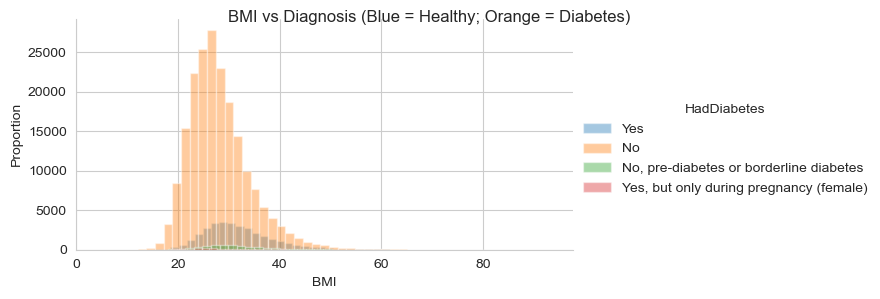

In [5]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.distplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()
plotHistogram(df,"HadDiabetes",'BMI','BMI vs Diagnosis (Blue = Healthy; Orange = Diabetes)')


In [14]:
#Create a new dataframe just using BMI and HadDiabetes
selected_columns = ['BMI', 'WeightInKilograms', 'HadDiabetes']

#create a new dataframe
new_df = df[selected_columns].copy()
print(new_df)

              BMI  WeightInKilograms                              HadDiabetes
0       32.099998          84.820000                                      Yes
1       27.990000          71.669998                                       No
2       22.530001          71.209999                                       No
3       30.129999          95.250000                                      Yes
4       27.760000          78.019997                                       No
...           ...                ...                                      ...
237625  36.580002          90.720001                                      Yes
237626  25.059999          72.570000                                       No
237627  22.889999          70.309998                                       No
237628  18.840000          46.720001                                       No
237629  32.419998          83.010002  No, pre-diabetes or borderline diabetes

[237630 rows x 3 columns]


In [15]:
#Convert the HadDiabetes column to 0 (no) or 1 (yes)
new_df['HadDiabetes'] = np.where(new_df['HadDiabetes'] == 'Yes', 1, 0)
print(new_df)

              BMI  WeightInKilograms  HadDiabetes
0       32.099998          84.820000            1
1       27.990000          71.669998            0
2       22.530001          71.209999            0
3       30.129999          95.250000            1
4       27.760000          78.019997            0
...           ...                ...          ...
237625  36.580002          90.720001            1
237626  25.059999          72.570000            0
237627  22.889999          70.309998            0
237628  18.840000          46.720001            0
237629  32.419998          83.010002            0

[237630 rows x 3 columns]


In [16]:
new_df.corr()

,BMI,WeightInKilograms,HadDiabetes
BMI,1.000000,0.859318,0.196938
WeightInKilograms,0.859318,1.000000,0.167377
HadDiabetes,0.196938,0.167377,1.000000


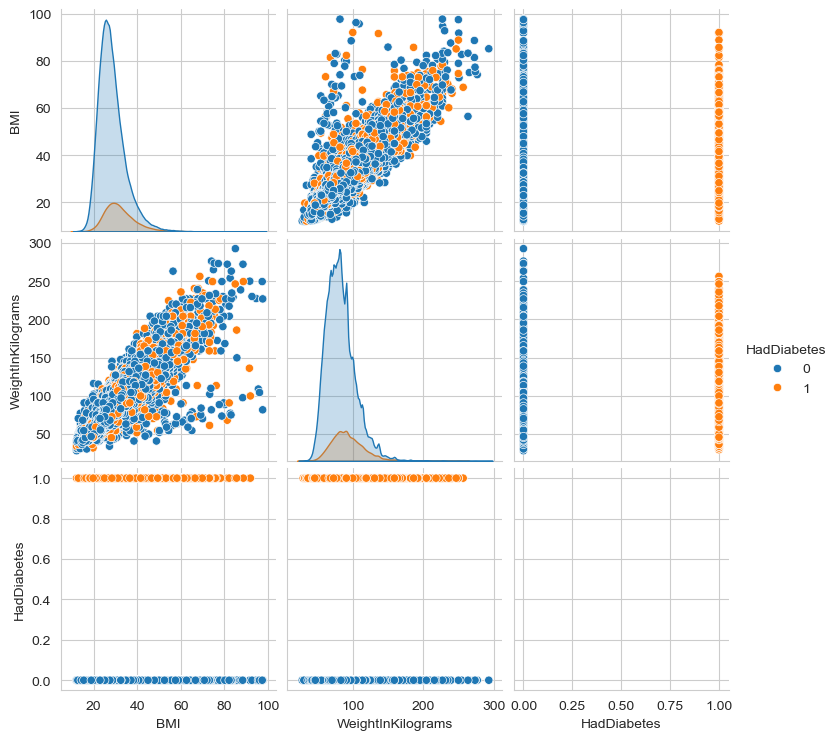

In [41]:
# Pairplot of the dataset
sns.pairplot(new_df, vars=['BMI', 'WeightInKilograms', 'HadDiabetes'], hue = 'HadDiabetes')
plt.show()

Decision Tree Model

In [31]:
# Splitting into Train and Test sets
X = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [22]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [24]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [25]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [27]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [28]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [29]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [30]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,40677,246
Actual 1,6480,123


Accuracy Score : 0.8584774649665446
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     40923
           1       0.33      0.02      0.04      6603

    accuracy                           0.86     47526
   macro avg       0.60      0.51      0.48     47526
weighted avg       0.79      0.86      0.80     47526



Logistics Regression Model

In [42]:
# Splitting into Train and Test sets
X = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [43]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [44]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [45]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
# Create the model
model = LogisticRegression()

# Fit the model
model.fit(X_train_scaled, y_train)

# Display the coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [-1.90893513]
Coefficients: [[0.4753587  0.01980966]]


In [47]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [48]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate classification report
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.8591928628540167
Confusion Matrix:
 [[40758   165]
 [ 6527    76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92     40923
           1       0.32      0.01      0.02      6603

    accuracy                           0.86     47526
   macro avg       0.59      0.50      0.47     47526
weighted avg       0.79      0.86      0.80     47526



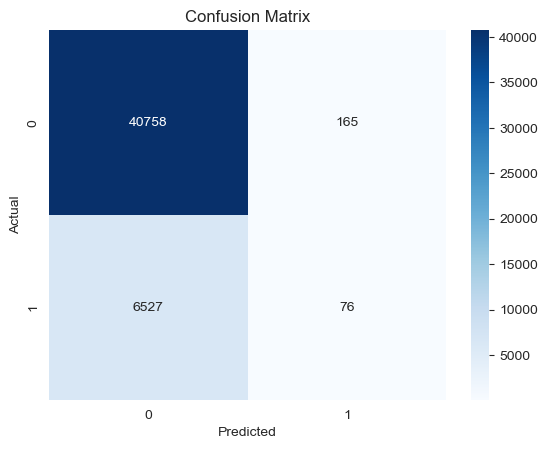

In [52]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()